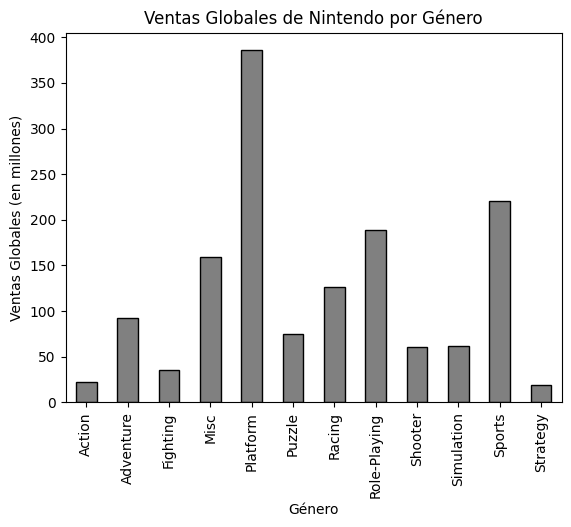

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('../data/Video-Games-Sales-Editado.csv')
df_nintendo=df[df['Publisher'] =='Nintendo']

suma_por_genero = df_nintendo.groupby('Genre')['Global'].sum()
suma_por_genero.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Ventas Globales de Nintendo por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

El género predominante es Plataforma. 

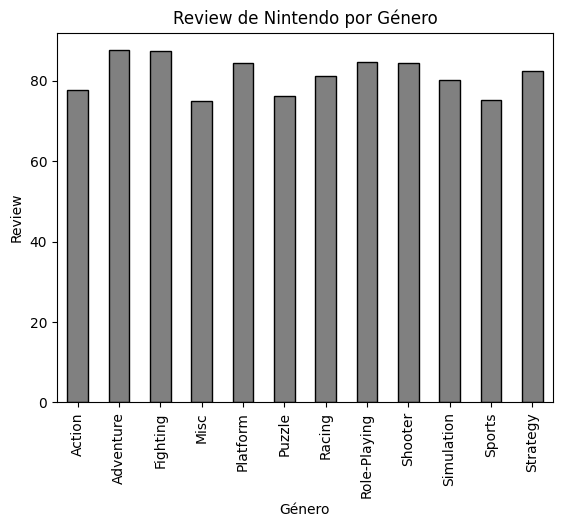

In [37]:
promedio_reviev_por_genero = df_nintendo.groupby('Genre')['Review'].mean()
promedio_reviev_por_genero.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Review de Nintendo por Género')
plt.xlabel('Género')
plt.ylabel('Review')
plt.show()

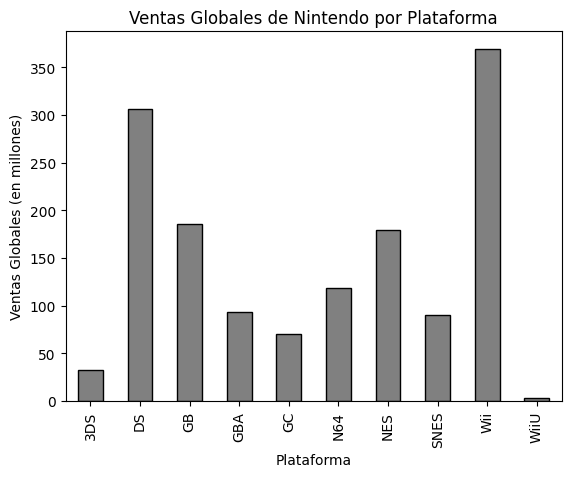

In [23]:
suma_por_plataforma = df_nintendo.groupby('Platform')['Global'].sum()
suma_por_plataforma.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Ventas Globales de Nintendo por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

Predominancia de las consolas Wii y Ds.

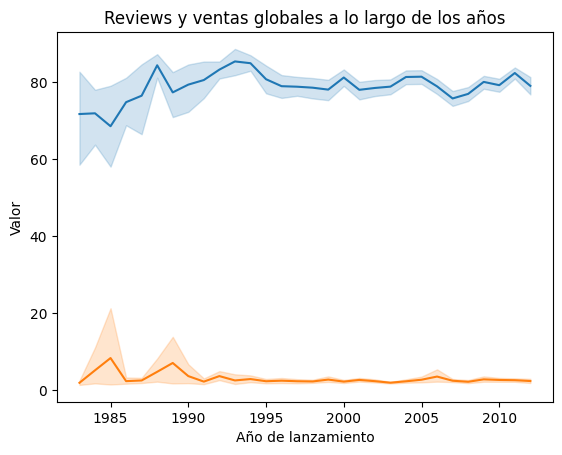

In [46]:
import seaborn as sns


sns.lineplot(x="Year", y='Review', data=df)
sns.lineplot(x="Year", y='Global', data=df )

plt.xlabel('Año de lanzamiento')
plt.ylabel('Valor')
plt.title('Reviews y ventas globales a lo largo de los años')
plt.show()

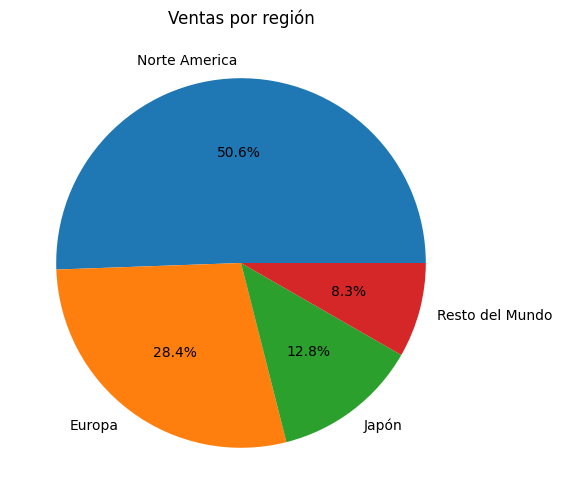

In [57]:
regiones=["North America","Europe","Japan","Rest of World"]
ventas_totales = df[regiones].sum()

plt.figure(figsize=(6, 6))
plt.pie(ventas_totales, labels=['Norte America','Europa','Japón','Resto del Mundo'], autopct='%1.1f%%')
plt.title('Ventas por región')
plt.show()

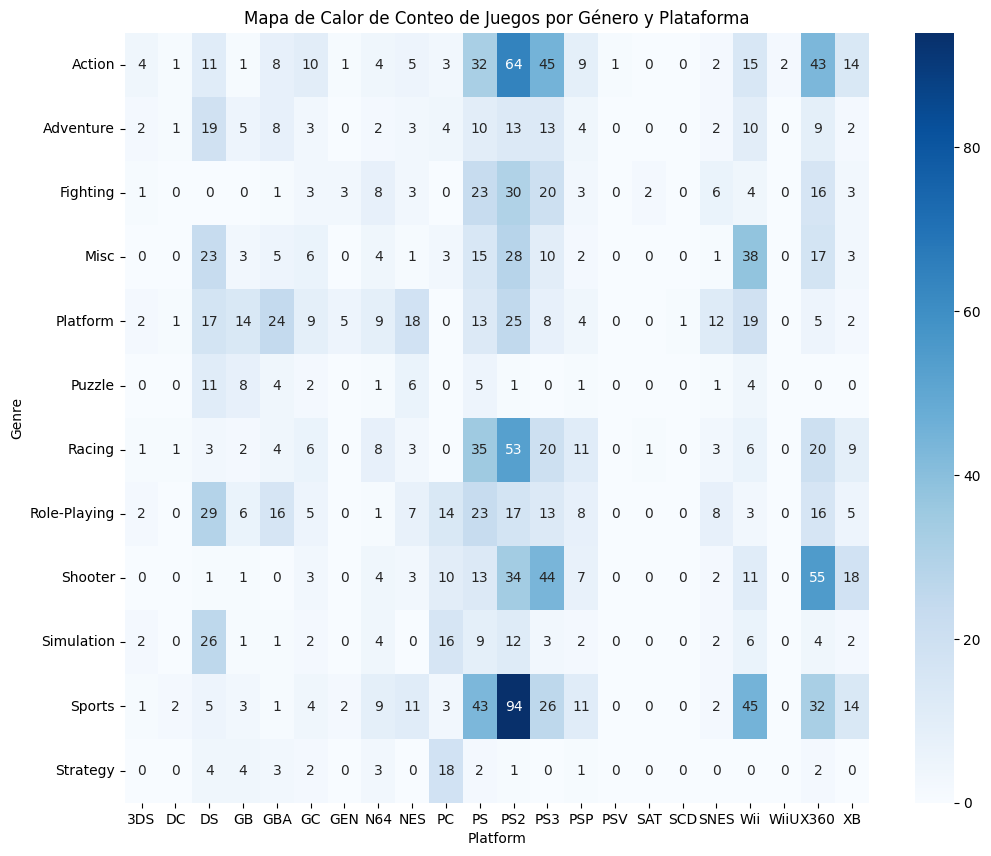

In [86]:
contador_plataforma_genero = df.groupby(['Genre', 'Platform']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 10))
sns.heatmap(contador_plataforma_genero, annot=True, cmap='Blues', fmt='d')

plt.title('Mapa de Calor de Conteo de Juegos por Género y Plataforma')


plt.show()

Observamos que la plataforma Playstation 2 lidera entre los géneros de Deportes, acción y carreras.